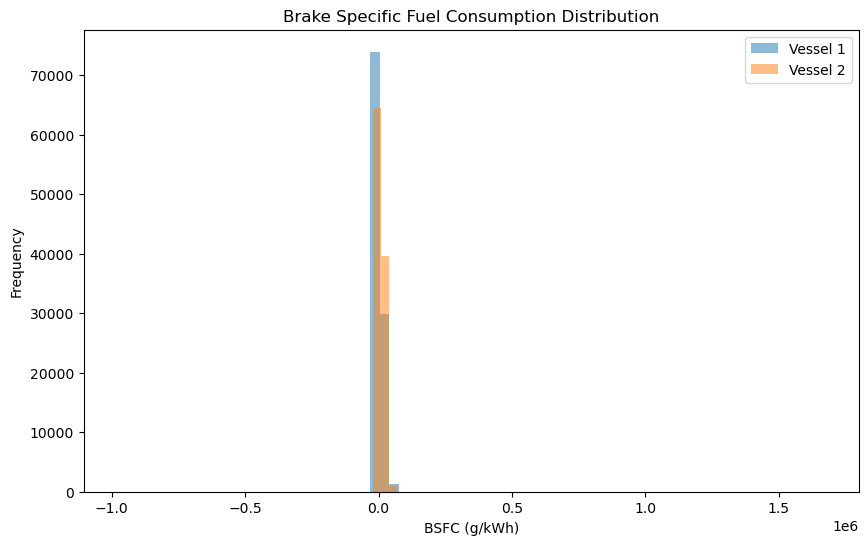


BSFC Summary Statistics:
                count    unique  top   freq
Vessel Name                                
Vessel 1     105119.0  103866.0  0.0   42.0
Vessel 2     105102.0  103539.0  0.0  660.0


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os
import numpy as np

# Project root 
PROJECT_ROOT = r"C:\Users\nirma\Cruise_ship_Perfomance"
sys.path.append(PROJECT_ROOT)
from src.data.loader import load_data
from src.features.engineering import engineer_features
from src.analysis.efficiency import calculate_bsfc, calculate_fuel_per_nm

# Load and process data
DATA_PATH = os.path.join(PROJECT_ROOT, 'data', 'processed', 'cleaned_data.csv')
df = load_data(DATA_PATH)
df = engineer_features(df)

# Calculate efficiency metrics
df['BSFC'] = calculate_bsfc(df)
df['Fuel_per_nm'] = calculate_fuel_per_nm(df)

# Create figures directory if it doesn't exist
os.makedirs(os.path.join(PROJECT_ROOT, 'reports', 'figures'), exist_ok=True)

# Visualize BSFC distribution
plt.figure(figsize=(10, 6))
for vessel in df['Vessel Name'].unique():
    vessel_df = df[df['Vessel Name'] == vessel]
    # Remove NA values and convert to numpy array for histogram
    bsfc_data = vessel_df['BSFC'].dropna().values
    if len(bsfc_data) > 0:  # Only plot if we have valid data
        plt.hist(bsfc_data, bins=50, alpha=0.5, label=vessel)

plt.title('Brake Specific Fuel Consumption Distribution')
plt.xlabel('BSFC (g/kWh)')
plt.ylabel('Frequency')
plt.legend()
plt.savefig(os.path.join(PROJECT_ROOT, 'reports', 'figures', 'bsfc_distribution.png'))
plt.show()

# Print summary statistics
print("\nBSFC Summary Statistics:")
print(df.groupby('Vessel Name')['BSFC'].describe())